* Based in the mapping dict we need to map the old zones to new zones in the Demand Matrix.

In [1]:
#import mapping zones json

import json

with open("zones_mapping.json","r") as file:
    mapping_zones_dict = json.load(file)
file.close()
mapping_zones_dict

{'163': 1,
 '152': 2,
 '151': 3,
 '127': 4,
 '120': 5,
 '119': 6,
 '118': 7,
 '117': 8,
 '116': 9,
 '115': 10,
 '114': 11,
 '113': 12,
 '112': 13,
 '111': 14,
 '108': 15,
 '107': 16,
 '106': 17,
 '105': 18,
 '103': 19,
 '74': 20,
 '73': 21,
 '72': 22,
 '153': 23,
 '154': 24,
 '155': 25,
 '157': 26,
 '899': 27,
 '890': 28,
 '874': 29,
 '873': 30,
 '71': 31,
 '871': 32,
 '870': 33,
 '869': 34,
 '872': 35,
 '867': 36,
 '861': 37,
 '853': 38,
 '851': 39,
 '162': 40,
 '159': 41,
 '158': 42,
 '868': 43,
 '70': 44,
 '955': 45,
 '956': 46,
 '957': 47,
 '958': 48,
 '959': 49,
 '963': 50,
 '997': 51,
 '976': 52,
 '265': 53,
 '266': 54,
 '267': 55,
 '268': 56,
 '836': 57,
 '951': 58,
 '952': 59,
 '953': 60,
 '263': 61,
 '954': 62,
 '974': 63,
 '975': 64,
 '977': 65,
 '978': 66,
 '979': 67,
 '982': 68,
 '983': 69,
 '984': 70,
 '960': 71,
 '123': 72,
 '264': 73,
 '285': 74,
 '291': 75,
 '290': 76,
 '289': 77,
 '288': 78,
 '287': 79,
 '286': 80,
 '284': 81,
 '282': 82,
 '283': 83,
 '440': 84,
 '441'

In [5]:
# mapping zones of the demand matrix (.mtx, type-o) based in the json.

ix = 0
count = 1
zx = float('inf')
FLAG = True
with open("Mat_Priv_TyE_2020.mtx", encoding='utf-8', errors='ignore', mode='r') as inF, \
     open("Mat_Priv_TyE_2020_out.mtx", encoding='utf-8', errors='ignore', mode='w') as outF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
                zx = ix
            if FLAG:
                line = line.strip().split(' ')
                z1,z2 = [l for l in line[:-1] if len(l)>0]
                outF.write(' ' * 10 + str(mapping_zones_dict[z1]) +
                        ' '*10 + str(mapping_zones_dict[z2]) + 
                        ' ' + line[-1] + '\n'
                        )
        if ix < 8:
            outF.write(line)

        if ix>= zx:
            
            if (line[0] == '$' or line[0] == '*'):
                outF.write(line)
            else:
                z = line.strip().split(' ')[0]
                outF.write(str(mapping_zones_dict[z]) + ' ""' + '\n')
                count += 1
        ix += 1
inF.close()
outF.close()

*  Import mtx type-o skim matrices

116.39


tt0
fromZone toZone       
1        2        4.63
         3        5.45
         4       18.25
         5       10.05
         6        3.89
...                ...
766      761      0.80
         762     59.94
         763     45.78
         764     43.14
         765     43.14

[585988 rows x 1 columns]

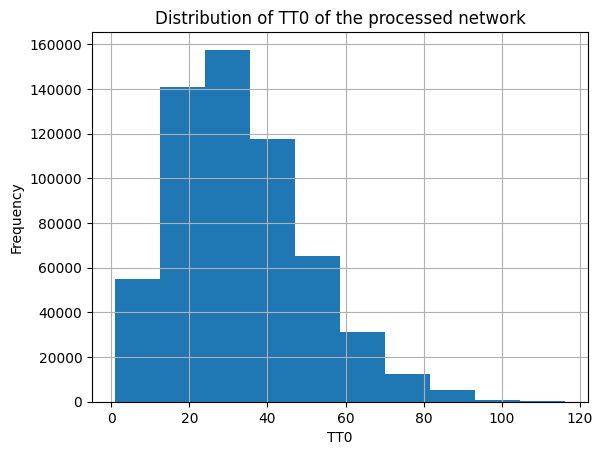

In [106]:
#import tt0 matrix of the processed network
import pandas as pd
import matplotlib.pyplot as plt

ix = 0
FLAG = True
data = {'fromZone':[], 'toZone': [], 'tt0': []}
with open("out.TT0.mtx", encoding='utf-8', errors='ignore', mode='r') as inF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
            if FLAG:
                line = line.strip().split(' ')
                z1,z2,v = [l for l in line if len(l)>0]
                data['fromZone'].append(int(z1))
                data['toZone'].append(int(z2))
                data['tt0'].append(float(v))
        ix += 1
inF.close()
proc_df = pd.DataFrame(data)
proc_df.set_index(['fromZone', 'toZone'], inplace=True)
print(proc_df['tt0'].max())
proc_df['tt0'].hist()
plt.xlabel('TT0')
plt.ylabel('Frequency')
plt.title('Distribution of TT0 of the processed network')
proc_df

In [104]:
#import tt0 matrix of the original network

ix = 0
FLAG = True
data = {'fromZone':[], 'toZone': [], 'tt0': []}
with open("base.TT0.mtx", encoding='utf-8', errors='ignore', mode='r') as inF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
            if FLAG:
                line = line.strip().split(' ')
                z1,z2,v = [l for l in line if len(l)>0]
                data['fromZone'].append(mapping_zones_dict[z1])
                data['toZone'].append(mapping_zones_dict[z2])
                data['tt0'].append(float(v))
        ix += 1
inF.close()
orig_df = pd.DataFrame(data)
orig_df.set_index(['fromZone', 'toZone'], inplace=True)
orig_df = orig_df.sort_index()
#orig_df


tt0
fromZone toZone       
1        2        4.04
         3        5.45
         4       17.62
         5        7.03
         6        3.46
...                ...
766      761      0.80
         762     58.98
         763     45.60
         764     42.68
         765     42.68

[585988 rows x 1 columns]

processed 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 763 
 762 
 98.880000 
 
 
 550 
 762 
 98.880000 
 
 
 548 
 762 
 98.880000 
 
 
 746 
 98.880000 
 
 
 550 
 746 
 98.880000 
 
 
 763 
 746 
 98.880000 
 
 
 762 
 550 
 93.240000 
 
 
 746 
 548 
 93.240000 
 
 
 550 
 93.240000 
 
 
 763 
 93.240000 
 
 
 762 
 548 
 93.240000 
 
 
 763 
 93.240000 
 
 
 528 
 762 
 91.070000 
 
 
 746 
 91.070000 
 
 
 749 
 762 
 91.060000 
 
 
 746 
 91.060000 
 
 
 762 
 749 
 90.780000 
 
 
 746 
 749 
 90.780000 
 
 
 544 
 762 
 90.300000 
 
 
 746 
 90.300000 
 
 
 

 
 original 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 340 
 746 
 116.390000 
 
 
 762 
 116.390000 
 
 
 330 
 762 
 114.250000 
 
 
 746 
 114.250000 
 
 
 762 
 7 
 112.100000 
 
 
 746 
 7 
 112.100000 
 
 
 331 
 762 
 111.940000 
 
 
 746 
 111.940000 
 
 
 762 
 536 
 111.710000 
 
 
 746 
 536 
 111.710000 
 
 
 762 
 340 
 110.920000 
 
 
 746 
 340 
 110.920000 
 
 
 533 
 110.900000 
 
 
 762 
 533 
 110.900000 
 
 
 329 
 762 
 110.660000 
 
 
 746 
 110.660000 
 
 
 353 
 746 
 110.430000 
 
 
 762 
 110.430000 
 
 
 762 
 538 
 110.020000 
 
 
 746 
 538 
 110.020000

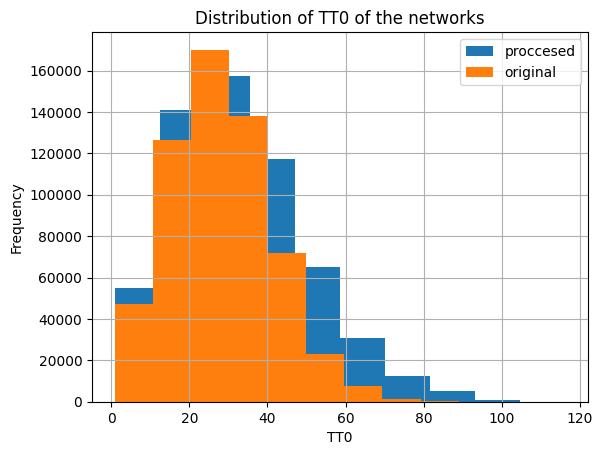

In [105]:
from IPython.display import display_html 


df1_styler = orig_df.sort_values('tt0',ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('processed')
df2_styler = proc_df.sort_values('tt0',ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('original')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)


proc_df['tt0'].hist(label='proccesed')
orig_df['tt0'].hist(label='original')
plt.xlabel('TT0')
plt.ylabel('Frequency')
plt.title('Distribution of TT0 of the networks')
plt.legend()

In [99]:
from IPython.display import display_html 


df1_styler = orig_df.head(20).style.set_table_attributes("style='display:inline'").set_caption('processed')
df2_styler = proc_df.head(20).style.set_table_attributes("style='display:inline'").set_caption('original')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

processed 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 1 
 2 
 4.040000 
 
 
 3 
 5.450000 
 
 
 4 
 17.620000 
 
 
 5 
 7.030000 
 
 
 6 
 3.460000 
 
 
 7 
 2.410000 
 
 
 8 
 2.100000 
 
 
 9 
 2.610000 
 
 
 10 
 2.710000 
 
 
 11 
 3.210000 
 
 
 12 
 2.350000 
 
 
 13 
 4.800000 
 
 
 14 
 4.820000 
 
 
 15 
 5.920000 
 
 
 16 
 8.580000 
 
 
 17 
 23.070000 
 
 
 18 
 9.600000 
 
 
 19 
 10.890000 
 
 
 20 
 16.640000 
 
 
 21 
 16.220000 
 
 
 

 
 original 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 1 
 2 
 4.630000 
 
 
 3 
 5.450000 
 
 
 4 
 18.250000 
 
 
 5 
 10.050000 
 
 
 6 
 3.890000 
 
 
 7 
 2.410000 
 
 
 8 
 2.100000 
 
 
 9 
 2.610000 
 
 
 10 
 2.720000 
 
 
 11 
 3.210000 
 
 
 12 
 2.350000 
 
 
 13 
 5.160000 
 
 
 14 
 5.640000 
 
 
 15 
 7.100000 
 
 
 16 
 8.760000 
 
 
 17 
 23.470000 
 
 
 18 
 9.600000 
 
 
 19 
 12.300000 
 
 
 20 
 16.640000 
 
 
 21 
 16.210000

tt0
fromZone toZone      
1        2       0.59
         3       0.00
         4       0.63
         5       3.02
         6       0.43
...               ...
766      761     0.00
         762     0.96
         763     0.18
         764     0.46
         765     0.46

[585988 rows x 1 columns]

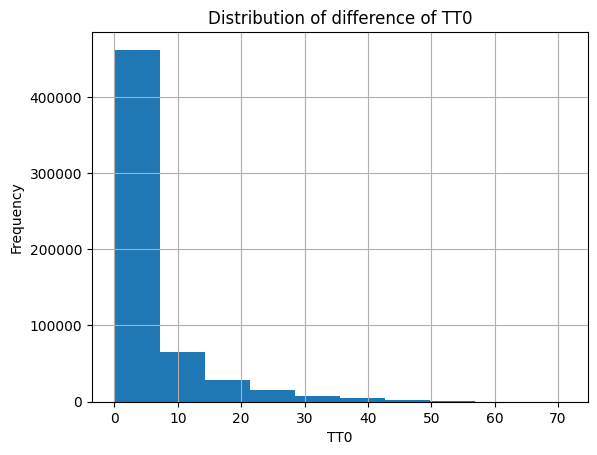

In [91]:
# distribution of difference 
#
from pandas import IndexSlice

(proc_df - orig_df).abs().hist()
plt.xlabel('TT0')
plt.ylabel('Frequency')
plt.title('Distribution of difference of TT0')
(proc_df - orig_df).abs()